In [36]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import urllib

In [9]:
dataset = load_dataset("DBQ/Farfetch.Product.prices.Macao")
df = pd.DataFrame(dataset['train'])

In [11]:
df.category1_code.value_counts()

category1_code
CLOTHING                 285757
SHOES                     80658
ACCESSORIES               48726
BAGS                      31825
PRE-OWNED                 18029
JEWELRY                   17873
TEEN GIRL CLOTHING        16426
TEEN BOY CLOTHING         14302
HOMEWARE                  13044
FINE JEWELRY               9709
BABY GIRL CLOTHING         6976
BABY BOY CLOTHING          6269
GIRLS CLOTHING             5949
LINGERIE & NIGHTWEAR       5505
BOYS CLOTHING              4866
ACTIVEWEAR                 3315
UNDERWEAR & SOCKS          3006
BOYS SHOES                 2274
TEEN GIRL SHOES            2153
TEEN BOY SHOES             2152
TEEN GIRL ACCESSORIES      1619
WATCHES                    1370
GIRLS SHOES                1300
TEEN BOY ACCESSORIES        980
NURSERY                     869
BABY BOY SHOES              793
BABY GIRL SHOES             505
GIRLS ACCESSORIES           478
BOYS ACCESSORIES            428
BABY GIRL ACCESSORIES       322
BABY BOY ACCESSORIES     

In [12]:
df.category2_code.value_counts()

category2_code
TOPS                      61033
JACKETS                   38843
PANTS                     34741
SNEAKERS                  34444
DRESSES                   32459
                          ...  
TEEN UNDERWEAR                4
DUMMY BAGS & CLIPS            4
DECK SHOES                    2
DEMI-FINE BODY JEWELRY        1
BRIDAL ACCESSORIES            1
Name: count, Length: 226, dtype: int64

In [32]:
dresses = df[df.category2_code == 'DRESSES']
print(f"Shape of the dataset: {dresses.shape}")
dresses.head(3)

Shape of the dataset: (32459, 17)


,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount
1,Farfetch,2023-11-17,MAC,HKD,PHILOSOPHY DI LORENZO SERAFINI,CLOTHING,DRESSES,EVENING DRESSES,19535310,pattern-print short-sleeve gown,http://www.farfetch.com/mo/shopping/women/phil...,https://cdn-images.farfetch-contents.com/19/53...,9038.0,5423.0,1068.44,641.09,1
2,Farfetch,2023-11-17,MAC,HKD,ALEMAIS,CLOTHING,DRESSES,DAY DRESSES,20192671,Elisabetta floral-print linen minidress,http://www.farfetch.com/mo/shopping/women/alem...,https://cdn-images.farfetch-contents.com/20/19...,3821.0,3821.0,451.70,451.70,0
57,Farfetch,2023-11-17,MAC,HKD,LA DOUBLEJ,CLOTHING,DRESSES,DAY DRESSES,15796492,Long and Sassy floral ruffle dress,http://www.farfetch.com/mo/shopping/women/la-d...,https://cdn-images.farfetch-contents.com/15/79...,6830.0,6830.0,807.42,807.42,0


In [16]:
dresses.category3_code.value_counts()

category3_code
DAY DRESSES                               16738
COCKTAIL & PARTY DRESSES                   7784
EVENING DRESSES                            4787
CASUAL DRESSES                              983
GIRLS CASUAL DRESSES                        855
PARTY & SPECIAL OCCASION DRESSES            529
GIRLS PARTY & SPECIAL OCCASION DRESSES      352
SUNDRESSES                                  170
BRIDAL DRESSES                              103
DRESS SETS                                   73
KNITTED DRESSES                              56
GIRLS KNITTED DRESSES                        26
ROMPERS                                       1
WOOL COATS                                    1
GIRLS DRESS SETS                              1
Name: count, dtype: int64

In [25]:
dresses[dresses.category3_code == 'SUNDRESSES'].sample(1).itemurl.item()

'http://www.farfetch.com/mo/shopping/women/lemlem-eskedar-stripe-print-midi-dress-item-19123697.aspx?storeid=11871'

In [29]:
dresses[dresses.product_code == 19123697].imageurl.item()

'https://cdn-images.farfetch-contents.com/19/12/36/97/19123697_43613998_480.jpg'

In [33]:
dresses.brand.value_counts().head(30)

brand
P.A.R.O.S.H.                      441
ZIMMERMANN                        360
SELF-PORTRAIT                     359
JENNY PACKHAM                     316
LA DOUBLEJ                        306
ULLA JOHNSON                      286
MICHELLE MASON                    267
GANNI                             258
CAMILLA                           256
DVF DIANE VON FURSTENBERG         253
PHILOSOPHY DI LORENZO SERAFINI    248
SACHIN & BABI                     242
REBECCA VALLANCE                  241
RACHEL GILBERT                    234
ALBERTA FERRETTI                  223
PHILIPP PLEIN                     222
ROTATE                            215
DION LEE                          207
STELLA MCCARTNEY                  206
PINKO                             204
LYGIA & NANNY                     204
SIMKHAI                           202
ALEXANDRE VAUTHIER                199
BALMAIN                           197
OSCAR DE LA RENTA                 194
MONNALISA                         191
OFF-WH

KeyboardInterrupt: 

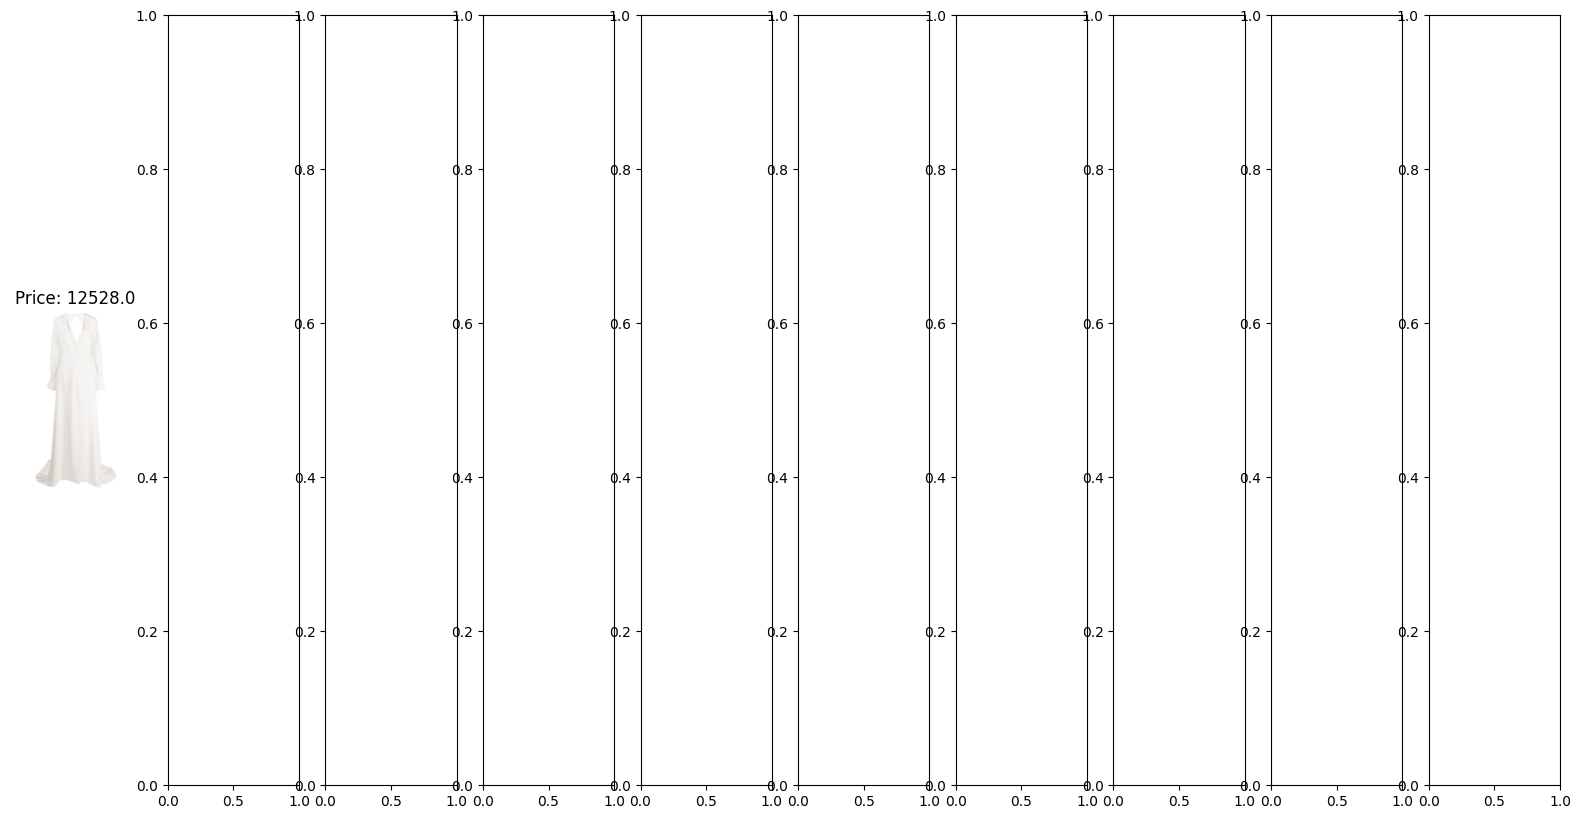

In [38]:
brand = 'SACHIN & BABI'
samples = dresses[dresses.brand == brand].sample(10).reset_index(drop=True)

fig, ax = plt.subplots(1,10, figsize=(20,10))
for i, row in samples.iterrows():
    url = row.imageurl
    response = urllib.request.urlopen(url)
    img = plt.imread(response, format='JPG')
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title(f"Price: {row.price}")

In [46]:
f = df[df.product_code == 20733271].imageurl.item()
response = urllib.request.urlopen(f)
img = plt.imread(response, format='JPG')
plt.imshow(img)

KeyboardInterrupt: 

In [48]:
# Save image to disk
import requests
f = df[df.product_code == 20102156].imageurl.item()
img_data = requests.get(f).content
with open('test.png', 'wb') as handler:
        handler.write(img_data)   

KeyboardInterrupt: 

In [50]:
samples

,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount
0,Farfetch,2023-11-17,MAC,HKD,SACHIN & BABI,CLOTHING,DRESSES,BRIDAL DRESSES,18070255,Britt sequin-embellished long-sleeved gown,http://www.farfetch.com/mo/shopping/women/sach...,https://cdn-images.farfetch-contents.com/18/07...,12528.0,12528.0,1481.02,1481.02,0
1,Farfetch,2023-11-17,MAC,HKD,SACHIN & BABI,CLOTHING,DRESSES,COCKTAIL & PARTY DRESSES,20733271,Audrey floral-print midi dress,http://www.farfetch.com/mo/shopping/women/sach...,https://cdn-images.farfetch-contents.com/20/73...,7691.0,7691.0,909.20,909.20,0
2,Farfetch,2023-11-17,MAC,HKD,SACHIN & BABI,CLOTHING,DRESSES,EVENING DRESSES,20102156,Bryce belted dress,http://www.farfetch.com/mo/shopping/women/sach...,https://cdn-images.farfetch-contents.com/20/10...,4353.0,4353.0,514.59,514.59,0
3,Farfetch,2023-11-17,MAC,HKD,SACHIN & BABI,CLOTHING,DRESSES,DAY DRESSES,18464115,Tori one shoulder printed maxi dress,http://www.farfetch.com/mo/shopping/women/sach...,https://cdn-images.farfetch-contents.com/18/46...,6724.0,3362.0,794.89,397.44,1
4,Farfetch,2023-11-17,MAC,HKD,SACHIN & BABI,CLOTHING,DRESSES,COCKTAIL & PARTY DRESSES,19702982,Brooke watercolour-effect gown,http://www.farfetch.com/mo/shopping/women/sach...,https://cdn-images.farfetch-contents.com/19/70...,7981.0,7981.0,943.49,943.49,0
5,Farfetch,2023-11-17,MAC,HKD,SACHIN & BABI,CLOTHING,DRESSES,EVENING DRESSES,18849099,Greta fitted sequin gown,http://www.farfetch.com/mo/shopping/women/sach...,https://cdn-images.farfetch-contents.com/18/84...,10593.0,9004.0,1252.27,1064.42,1
6,Farfetch,2023-11-17,MAC,HKD,SACHIN & BABI,CLOTHING,DRESSES,DAY DRESSES,15164245,Camila flared hem dress,http://www.farfetch.com/mo/shopping/women/sach...,https://cdn-images.farfetch-contents.com/15/16...,6288.0,6288.0,743.35,743.35,0
7,Farfetch,2023-11-17,MAC,HKD,SACHIN & BABI,CLOTHING,DRESSES,EVENING DRESSES,18849095,Desdemona crystal-detail gown,http://www.farfetch.com/mo/shopping/women/sach...,https://cdn-images.farfetch-contents.com/18/84...,11560.0,9248.0,1366.59,1093.27,1
8,Farfetch,2023-11-17,MAC,HKD,SACHIN & BABI,CLOTHING,DRESSES,EVENING DRESSES,19704376,Kenzia fitted-waist gown,http://www.farfetch.com/mo/shopping/women/sach...,https://cdn-images.farfetch-contents.com/19/70...,8658.0,8658.0,1023.52,1023.52,0
9,Farfetch,2023-11-17,MAC,HKD,SACHIN & BABI,CLOTHING,DRESSES,EVENING DRESSES,20731568,Aubrey satin-finish bow gown,http://www.farfetch.com/mo/shopping/women/sach...,https://cdn-images.farfetch-contents.com/20/73...,7691.0,7691.0,909.20,909.20,0


In [54]:
f = df[df.product_code == 18849095].imageurl.item()
img_data = requests.get(f).content